In [19]:
## Loading the required libraries:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis

import warnings
warnings.filterwarnings('ignore')

In [20]:
dec_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce User behavior Analysis /Data/2019-Dec.csv')
dec_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [16]:
dec_data['event_time']=pd.to_datetime(dec_data['event_time']).dt.tz_convert(None)
dec_data['event_type']=dec_data['event_type'].astype('category')

In [5]:
dec_data.shape

(3533286, 9)

In [6]:
dec_data.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
dtype: int64

In [8]:
dec_data.event_type.unique()

array(['remove_from_cart', 'view', 'cart', 'purchase'], dtype=object)

In [9]:
dec_data['event_type'].value_counts()

view                1728331
cart                 927124
remove_from_cart     664655
purchase             213176
Name: event_type, dtype: int64

In [3]:
dec_data_NaN = dec_data[dec_data['brand'].isna()]
dec_data_purchase = dec_data[dec_data['event_type']=='purchase']
dec_data_cart = dec_data[dec_data['event_type']=='cart']

In [5]:
dec_data_purchase['brand'].value_counts()

runail       18199
irisk        10583
grattol       8171
bpw.style     7014
masura        6985
             ...  
barbie           1
skinity          1
foamie           1
mielle           1
litaline         1
Name: brand, Length: 222, dtype: int64

In [6]:
dec_data_purchase[['brand','price']].groupby('brand').sum('price').sort_values('price',ascending=False)

,price
brand,
runail,58177.26
grattol,43793.50
irisk,35291.51
uno,29084.76
estel,24474.19
...,...
andrea,5.54
cosima,4.76
skinity,4.44


In [7]:
dec_data_purchase['date'] = pd.to_datetime(dec_data_purchase['event_time']).dt.date
dec_data_purchase['hours'] = pd.to_datetime(dec_data_purchase['event_time']).dt.hour

In [8]:
#How many orders are placed everyday
dec_data_purchase[['date']].groupby('date').size()

date
2019-12-01    7236
2019-12-02    9079
2019-12-03    8217
2019-12-04    8371
2019-12-05    7767
2019-12-06    7383
2019-12-07    6023
2019-12-08    6595
2019-12-09    9294
2019-12-10    9794
2019-12-11    9390
2019-12-12    9396
2019-12-13    7796
2019-12-14    6038
2019-12-15    7019
2019-12-16    9226
2019-12-17    8425
2019-12-18    7818
2019-12-19    7143
2019-12-20    6308
2019-12-21    5603
2019-12-22    6086
2019-12-23    6939
2019-12-24    6901
2019-12-25    6671
2019-12-26    5914
2019-12-27    4706
2019-12-28    4786
2019-12-29    3493
2019-12-30    2633
2019-12-31    1126
dtype: int64

In [9]:
#How many orders are placed by hour
dec_data_purchase.groupby('hours').size()

hours
0      2003
1      1648
2      1995
3      2734
4      3321
5      6068
6      8496
7     10871
8     11884
9     12642
10    13894
11    14850
12    13138
13    12455
14    11993
15    10582
16    10405
17    11046
18    11703
19    11629
20    12268
21     8896
22     5809
23     2846
dtype: int64

In [11]:
# Analysis by cart
dec_data_cart.shape

(927124, 9)

In [12]:
dec_data_cart['brand'].value_counts()

runail       80411
irisk        45841
grattol      37841
masura       33788
bpw.style    21995
             ...  
barbie           2
fedua            1
philips          1
neoleor          1
zab              1
Name: brand, Length: 230, dtype: int64

In [15]:
dec_data.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [17]:
daily_summary_table=dec_data.groupby(by=[dec_data['event_time'].dt.normalize()]).agg(Number_of_daily_visits=('user_session',lambda x: x.nunique()),
                                                                                  Number_of_daily_visitors=('user_id',lambda x: x.nunique())
                                                                                  )
sales_filter=dec_data['event_type']=='purchase'
sales=dec_data.loc[sales_filter].groupby(by=[dec_data['event_time'].dt.normalize()]).agg(number_of_daily_sales=('event_type','count'),
                                                                                      Total_daily_sales=('price','sum')
                                                                                      ).reset_index()
daily_summary_table=pd.merge(left=daily_summary_table,
                          right=sales,
                          left_on=['event_time'],
                          right_on=['event_time'],
                          how='left')
daily_summary_table['conversion_rate']=daily_summary_table['number_of_daily_sales']/daily_summary_table['Number_of_daily_visits']

In [18]:
daily_summary_table.head()

,event_time,Number_of_daily_visits,Number_of_daily_visitors,number_of_daily_sales,Total_daily_sales,conversion_rate
0,2019-12-01,29616,17540,7236,32701.10,0.244327
1,2019-12-02,31948,19391,9079,43304.28,0.284181
2,2019-12-03,30841,18735,8217,38703.91,0.266431
3,2019-12-04,30422,18836,8371,41233.50,0.275163
4,2019-12-05,29983,18183,7767,37379.70,0.259047


Daily Visits Statistics
--------------------------------------------------
count       31.000000
mean     27539.032258
std       4827.533860
min      10369.000000
25%      25504.500000
50%      28879.000000
75%      30844.000000
max      33980.000000
Name: Number_of_daily_visits, dtype: float64
--------------------------------------------------
Visit Statistics by Dates
--------------------------------------------------
            count      mean          std  ...      50%       75%      max
event_time                                ...                            
Friday        4.0  26362.25  3279.104896  ...  26940.5  28442.75  29549.0
Monday        5.0  29523.00  5753.372011  ...  31948.0  32463.00  33980.0
Saturday      4.0  24667.50  1759.870166  ...  25095.5  26047.50  26082.0
Sunday        5.0  26555.60  3020.895447  ...  26968.0  28879.00  29616.0
Thursday      4.0  28632.00  2702.961709  ...  29466.5  30199.00  30847.0
Tuesday       5.0  26519.40  9235.928611  ...  30841.0  31

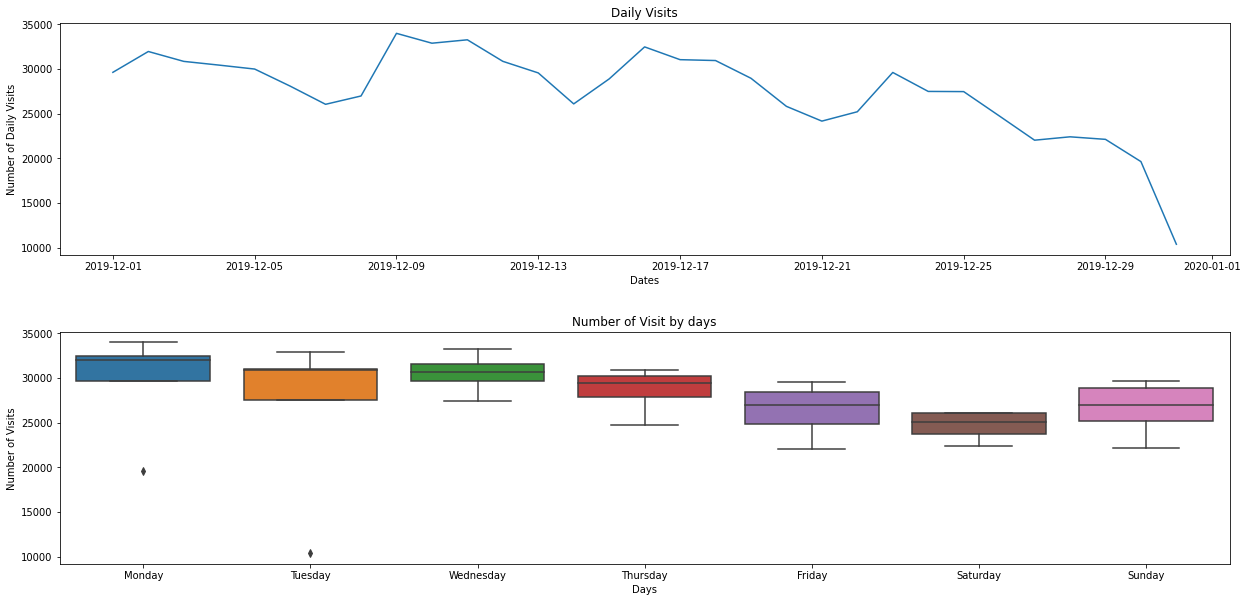

In [56]:
#Daily Visits
print('Daily Visits Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visits'].describe())
print('-'*50)
print('Visit Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visits'].describe())

#Plotting number of daily visits
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='Number_of_daily_visits',
              data=daily_summary_table,
             ax=ax1)
plt.title('Daily Visits')
plt.ylabel('Number of Daily Visits')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)

sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='Number_of_daily_visits',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visit by days')
plt.ylabel('Number of Visits')
plt.xlabel('Days')
plt.xticks([0,1,2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

Conversion Rates Statistics
--------------------------------------------------
count    31.000000
mean      0.243013
std       0.043084
min       0.108593
25%       0.233189
50%       0.244549
75%       0.268958
max       0.304600
Name: conversion_rate, dtype: float64
--------------------------------------------------
Conversion Rates Statistics by Dates
--------------------------------------------------
            count      mean       std  ...       50%       75%       max
event_time                             ...                              
Friday        4.0  0.246243  0.023455  ...  0.253707  0.263196  0.263833
Monday        5.0  0.242098  0.063710  ...  0.273514  0.284181  0.284200
Saturday      4.0  0.227121  0.008958  ...  0.231417  0.231616  0.231960
Sunday        5.0  0.226275  0.038208  ...  0.243049  0.244327  0.244549
Thursday      4.0  0.262338  0.029362  ...  0.252891  0.270435  0.304600
Tuesday       5.0  0.239113  0.074885  ...  0.266431  0.271485  0.297907
Wednesda

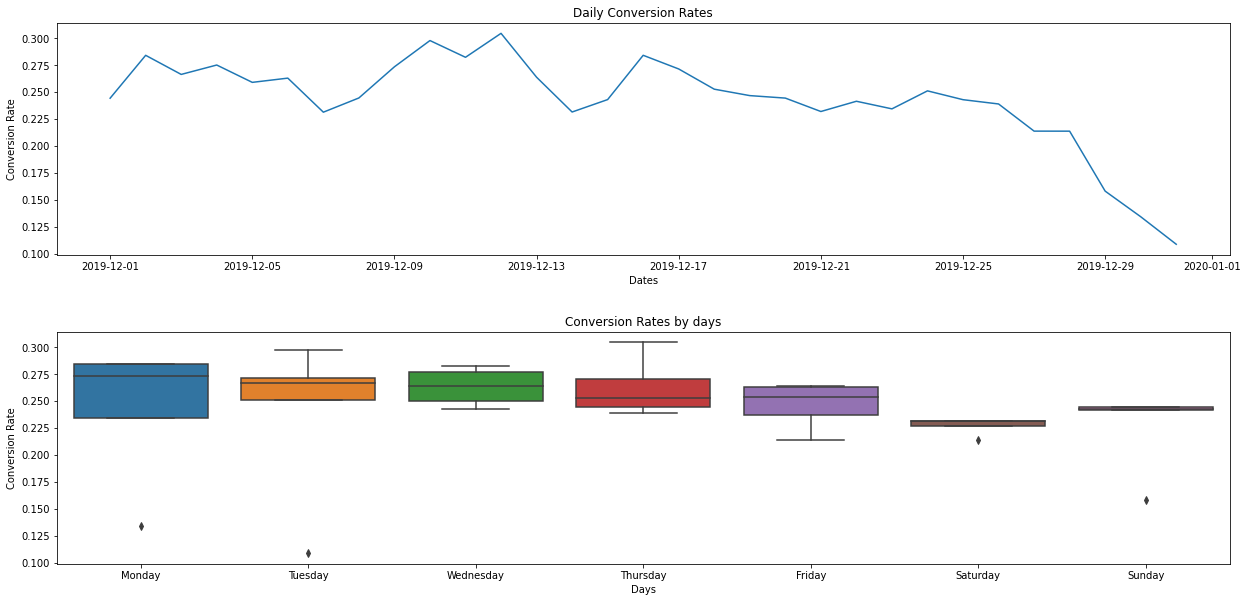

In [58]:
#Conversion rates
print('Conversion Rates Statistics')
print('-'*50)
print(daily_summary_table['conversion_rate'].describe())
print('-'*50)
print('Conversion Rates Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['conversion_rate'].describe())

#Plotting convergance rates
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='conversion_rate',
              data=daily_summary_table,
            ax=ax1)
plt.title('Daily Conversion Rates')
plt.ylabel('Conversion Rate')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='conversion_rate',
            data=daily_summary_table,
           ax=ax2)
plt.title('Conversion Rates by days')
plt.ylabel('Conversion Rate')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

In [59]:
#creating a customer table

#Filtering sales activities
sales_filter=dec_data['event_type']=='purchase'
Customer_table=dec_data.loc[sales_filter].groupby(by=['user_id']).agg(number_of_purchases=('user_id','count'),
                                                                     total_sales=('price','sum')).reset_index()

In [60]:
Customer_table.head()

,user_id,number_of_purchases,total_sales
0,12055855,4,16.54
1,15400971,3,35.71
2,25392526,3,22.14
3,28129653,23,81.05
4,31647175,2,15.88


In [62]:
#Calculating number of customers who bought something
Number_of_customers_who_bought_smt=Customer_table['user_id'].nunique()
print('There are {:,.0f} customers, who purchased in December.'.format(Number_of_customers_who_bought_smt))

#Calculating number of purchase activities for each customer
print('-'*50)
print('Distribution of Customer by Number of Purchases')
print(Customer_table['number_of_purchases'].value_counts(normalize=True).head(10))
#Calculationg repeat customers number
print('-'*50)
more_than_one_purchase_filter=Customer_table['number_of_purchases']>1
Number_of_customers_who_bought_more_than_once=Customer_table.loc[more_than_one_purchase_filter].shape[0]
print('There are {:,.0f} repeat customers, who bought more than once.'.format(Number_of_customers_who_bought_more_than_once))

There are 25,613 customers, who purchased in December.
--------------------------------------------------
Distribution of Customer by Number of Purchases
2     0.113692
1     0.113614
3     0.113107
4     0.098856
5     0.079569
6     0.067153
7     0.051653
8     0.046929
9     0.040370
10    0.036778
Name: number_of_purchases, dtype: float64
--------------------------------------------------
There are 22,703 repeat customers, who bought more than once.


            user_id  number_of_purchases   total_sales
count  2.561300e+04         25613.000000  25613.000000
mean   5.215827e+08             8.322961     42.073355
std    8.808569e+07            10.739698     52.597989
min    1.205586e+07             1.000000     -7.200000
25%    4.838006e+08             3.000000     15.120000
50%    5.584707e+08             5.000000     28.400000
75%    5.841410e+08            10.000000     49.320000
max    5.954135e+08           399.000000   1526.730000
            user_id  number_of_purchases   total_sales
count  2.407900e+04         24079.000000  24079.000000
mean   5.218153e+08             7.143154     33.814436
std    8.791275e+07             6.568859     23.803865
min    1.205586e+07             1.000000      3.650000
25%    4.839097e+08             3.000000     14.920000
50%    5.587515e+08             5.000000     26.980000
75%    5.842045e+08             9.000000     45.860000
max    5.954135e+08            73.000000    116.300000


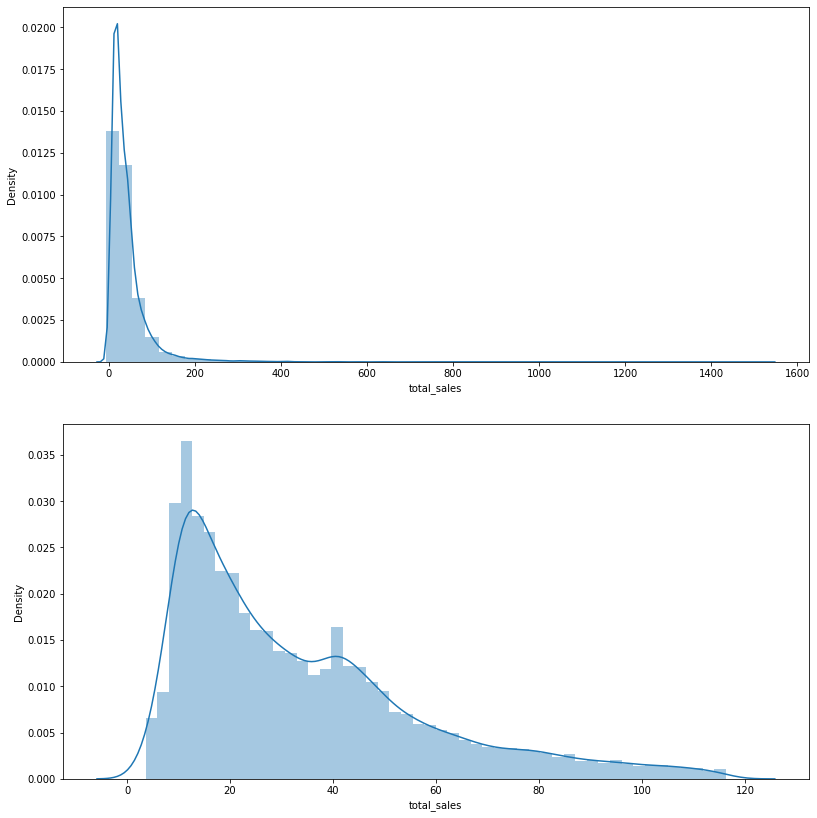

In [63]:
#filtering out the extreme values
sales_threshold=np.percentile(Customer_table['total_sales'],[1,95])
sales_threshold_filter=np.logical_and(Customer_table['total_sales']>=sales_threshold[0],
                                      Customer_table['total_sales']<=sales_threshold[1])
sales_filtered=Customer_table.loc[sales_threshold_filter]
print(Customer_table.describe())
print(sales_filtered.describe())

fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,1,1)
sns.distplot(Customer_table['total_sales'],
            ax=ax1)

ax2=fig.add_subplot(2,1,2)
sns.distplot(sales_filtered['total_sales'],
            ax=ax2)

fig.tight_layout(pad=3.0);

In [65]:
#Most valuable customers

#filtering customer with top %10 purchase amount
top10perc_sales_amount=np.percentile(Customer_table['total_sales'],90)
filter_top10perc_sales_amount=Customer_table['total_sales']>=top10perc_sales_amount
top10perc_customers_with_hightest_turnover=Customer_table.loc[filter_top10perc_sales_amount]
regular_customers=Customer_table.loc[~filter_top10perc_sales_amount]

#calculating descriptive statistics
print('Top 10% customers Purchase Amount-Descriptive Statistics')
print('-'*50)
print(top10perc_customers_with_hightest_turnover['total_sales'].describe())
print('-'*50)
total_sales_amount=Customer_table['total_sales'].sum()
print('Total sales: {:,.0f}'.format(total_sales_amount))
total_sales_amount_top10perc=top10perc_customers_with_hightest_turnover['total_sales'].sum()
print('Total sales of top 10% customers: {:,.0f}'.format(total_sales_amount_top10perc))

#calculating descriptive statistics
print('Regular customers Purchase Amount-Descriptive Statistics')
print('-'*50)
print(regular_customers['total_sales'].describe())
print('-'*50)
total_sales_amount_regular_customers=regular_customers['total_sales'].sum()
print('Total sales of regular customers: {:,.0f}'.format(total_sales_amount_regular_customers))

Top 10% customers Purchase Amount-Descriptive Statistics
--------------------------------------------------
count    2562.000000
mean      151.203618
std       105.783660
min        83.170000
25%        95.942500
50%       116.315000
75%       164.002500
max      1526.730000
Name: total_sales, dtype: float64
--------------------------------------------------
Total sales: 1,077,625
Total sales of top 10% customers: 387,384
Regular customers Purchase Amount-Descriptive Statistics
--------------------------------------------------
count    23051.000000
mean        29.944088
std         18.970944
min         -7.200000
25%         14.130000
50%         24.970000
75%         42.315000
max         83.160000
Name: total_sales, dtype: float64
--------------------------------------------------
Total sales of regular customers: 690,241


Cluster Statistics
--------------------------------------------------
           count        mean         std  ...      50%       75%      max
cluster                                   ...                            
0.0      12164.0   15.174464    5.826087  ...   14.600   19.7925    26.65
1.0       7441.0   38.156845    6.952986  ...   38.330   43.9200    51.21
2.0       3446.0   64.345305    9.168211  ...   62.965   71.6700    83.16
3.0       2562.0  151.203618  105.783660  ...  116.315  164.0025  1526.73

[4 rows x 8 columns]


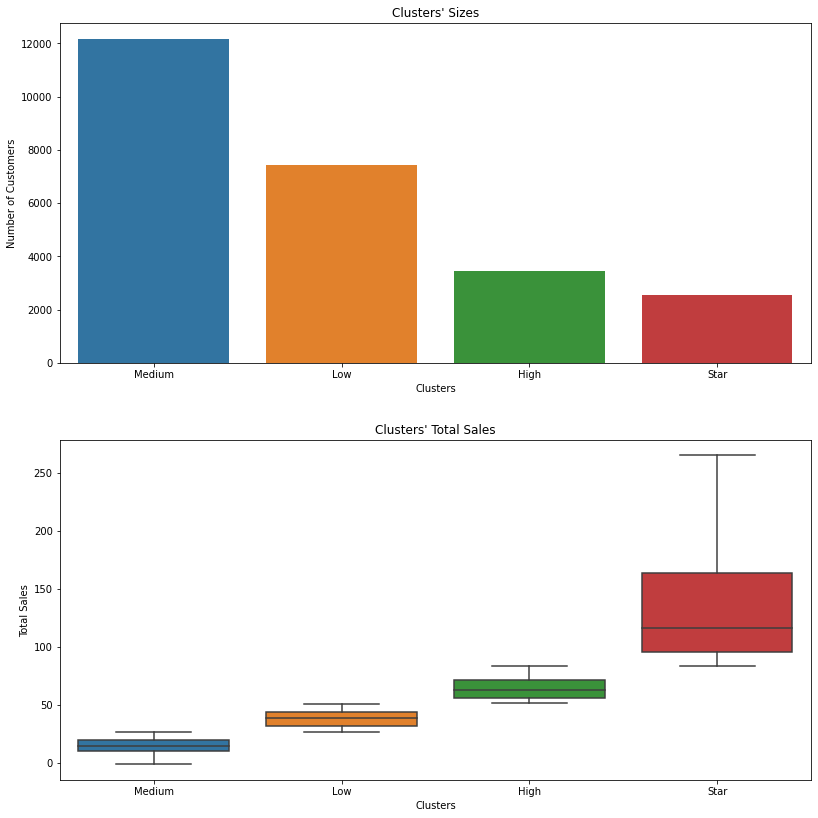

In [66]:
#creating subsegments from regular customers
from sklearn.cluster import KMeans
X=regular_customers['total_sales'].values.reshape(-1,1)
regular_customers['cluster']=Clustering_KMeans=KMeans(n_clusters=3,random_state=15).fit_predict(X)

#merging clusters
Customer_table=pd.merge(left=Customer_table,
                        right=regular_customers[['user_id','cluster']],
                        how='left',
                        left_on='user_id',
                        right_on='user_id')
Customer_table['cluster'].fillna(3,inplace=True)

#Plotting the clusters
print('Cluster Statistics')
print('-'*50)
print(Customer_table.groupby(by=['cluster'])['total_sales'].describe())

fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,1,1)
sns.countplot(x='cluster',data=Customer_table,ax=ax1)
plt.xlabel('Clusters')
plt.ylabel('Number of Customers')
plt.title("Clusters' Sizes")
ax1.set_xticklabels(['Medium','Low','High','Star']);

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x='cluster',y='total_sales',data=Customer_table,ax=ax2,showfliers = False)
plt.xlabel('Clusters')
plt.ylabel('Total Sales')
plt.title("Clusters' Total Sales")
fig.tight_layout(pad=3.0)
ax2.set_xticklabels(['Medium','Low','High','Star']);

In [68]:
#creating a filter for shoppers 
shopper_filter=dec_data['event_type']=='purchase'
#using the filter to create shopper user list
shopper_list=dec_data.loc[shopper_filter,['user_id']]
#distincting shopper customer list
distinct_shopper_df=pd.DataFrame(shopper_list['user_id'].unique(),columns=['user_id'])
#creating shopper dataset
dataset_shoppers=pd.merge(left=dec_data,
                          right=distinct_shopper_df,
                          how='inner',
                          left_on=['user_id'],
                          right_on=['user_id']
                          )

In [70]:
#user defined functions
def extract_categorycode(input_text,level=0):
    '''
     this function splits category code and returns the first part.
    '''
    output_text=input_text.split('.')[level]
    return output_text

def create_clusters(input_data_frame,input_columns,n_cluster):
    '''
     This function creates clusters and cluster labels.
    '''
    from sklearn.cluster import KMeans
    X=input_data_frame[input_columns].values
    k_means=KMeans(n_clusters=n_cluster,random_state=15).fit(X)
    return k_means.labels_

In [22]:
#creating a summary table that contains an outline of categories and activities
category_summary_table=dec_data.groupby(by=['category_id']).agg(Number_of_views=('category_id','count'),
                                                              Number_of_users=('user_id',lambda x: x.nunique()),
                                                              Number_of_sessions=('user_session',pd.Series.nunique)).reset_index()
sales_filter=dec_data['event_type']=='purchase'
category_sales_summary_table=dec_data.loc[sales_filter].groupby(by=['category_id']).agg(Number_of_purchase=('category_id','count'),
                                                                                      Amount_of_purchase=('price','sum'),
                                                                                      Average_purchase_amount=('price','mean'),
                                                                                      Number_of_sessions_with_purchase=('user_session',pd.Series.nunique),
                                                                                      Number_of_shoppers=('user_id',lambda x: x.nunique())).reset_index()
category_summary_table=pd.merge(left=category_summary_table,
                               right=category_sales_summary_table,
                               left_on='category_id',
                               right_on='category_id',
                               how='left')
category_summary_table['Conversion_rate']=category_summary_table['Number_of_purchase']/category_summary_table['Number_of_sessions']

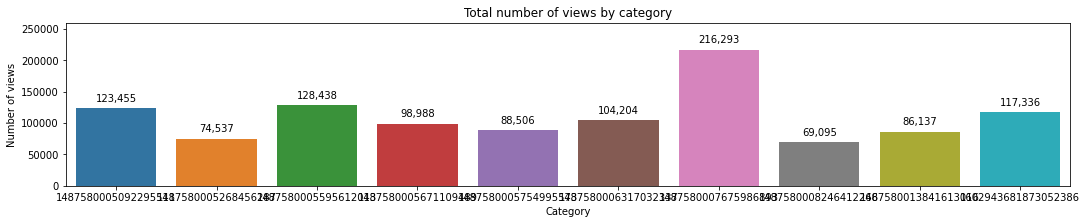

In [30]:
#creating a plot that illustrates number of visits in each category during October
x = category_summary_table.nlargest(10,'Number_of_views')['category_id']
y = category_summary_table.nlargest(10,'Number_of_views')['Number_of_views']
plt.figure(figsize=(18,3))
plot = sns.barplot(x,y)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ',.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.title('Total number of views by category')
plt.xlabel('Category')
plt.ylabel('Number of views')
plt.ylim(0,category_summary_table['Number_of_views'].max()*1.2);

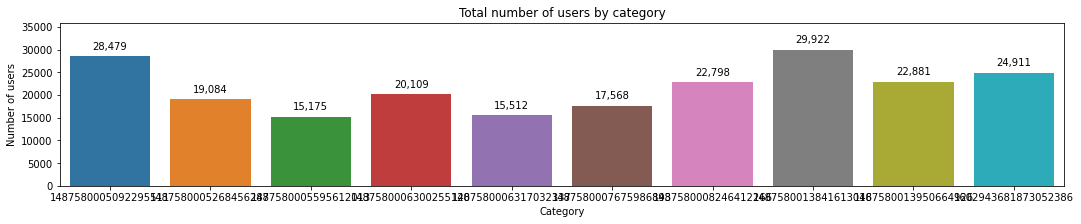

In [33]:
#creating a plot that illustrates number of visitors in each category during October
x = category_summary_table.nlargest(10,'Number_of_users')['category_id']
y = category_summary_table.nlargest(10,'Number_of_users')['Number_of_users']
plt.figure(figsize=(18,3))
plot = sns.barplot(x,y)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ',.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.title('Total number of users by category')
plt.xlabel('Category')
plt.ylabel('Number of users')
plt.ylim(0,category_summary_table['Number_of_users'].max()*1.2);

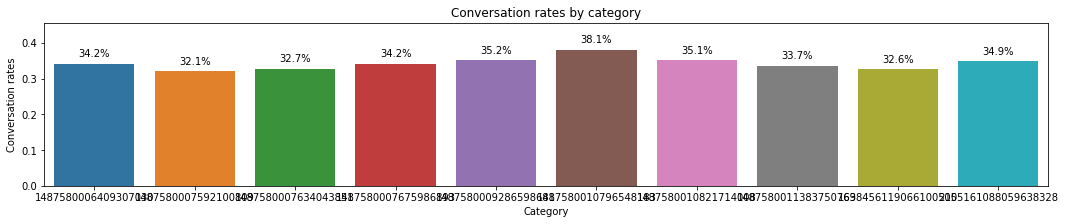

In [35]:
#creating a plot that represents conversion rates by categories
x = category_summary_table.nlargest(10,'Conversion_rate')['category_id']
y = category_summary_table.nlargest(10,'Conversion_rate')['Conversion_rate']
plt.figure(figsize=(18,3))
plot = sns.barplot(x,y)
for p in plot.patches:
    plot.annotate("{:.1%}".format(p.get_height()),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.title('Conversation rates by category')
plt.xlabel('Category')
plt.ylabel('Conversation rates')
plt.ylim(0,category_summary_table['Conversion_rate'].max()*1.2);